In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random

In [3]:
# 1. Review and state the following theorems of Calculus:

# a) Intermediate Value Theorem
# if f is a continuous function on [a, b], and u < v < w, where u = min(f) on [a, b] and w = max(f) on [a, b],
# then there must exist some c in [a, b] s.t. f(c) = v
#
# b) The Mean Value Theorem
# if f is a continuous function on [a, b] and differentiable on (a, b), there exists c in [a, b] s.t.
# f'(c) = f(b) - f(a) / b - a
#
# c) Rolle’s Theorem
# if f is a continuous function on [a, b] and differentiable on (a, b), and f(a) = f(b), there exists c in [a, b]
# s.t. f'(c) = 0
#
# d) Mean Value Theorem for integrals
# if f is a continuous function on [a, b], there exists a c in (a, b) s.t. f(c) = 1/(b-a) * the integral of f(x)
# from a to b
#
# e) Weighted Mean Value Theorem
# Assume f is a continuous function on [a, b], g does not change sign on [a, b], the integral of f(x)g(x) from a to b
# equals f(eta) * the integral of g(x) from a to b for some eta in [a, b]

In [4]:
# Sammy Suliman, last modified: 10/5/2022
# The purpose of the code is to implement the Composite Trapezoidal Rule, with the expected output being an
# approximation for the definite integral of a function f from a to b. The input parameters are the bounds of the
# definite integral, a, b, the number of subdivisions of the integral we want, N, and the function being integrated, f.

In [2]:
def comp_trap_rule(a, b, N, f):
    h = (b-a) / N
    x = [(a + j*h) for j in range(1, N)]
    trap = ((h / 2) * f(a)) + ((h / 2) * f(b))
    trap += h * sum([f(x_j) for x_j in x])
    return trap

In [3]:
def g(x):
    return x * np.exp(x**2)

In [4]:
# Sammy Suliman, last modified: 10/5/2022
# The purpose of the code is to find the error of the Composite Trapezoid Rule for different values of h. The expected
# output should verify that error decreases at a quadratic rate as h increases.

In [5]:
# actual value of integral:
integral = (1/2) * (np.exp(1) - 1)
print(integral)

0.8591409142295225


In [6]:
# h = 1/10
error1 = (math.fabs(comp_trap_rule(0, 1, 10, g) - integral))
print(error1)

0.005948917949110677


In [7]:
print(comp_trap_rule(0, 1, 10, g))

0.8650898321786332


In [8]:
# h = 1/20
error2 = math.fabs(comp_trap_rule(0, 1, 20, g) - integral)
print(error2)

0.0014897491768670612


In [9]:
# h = 1/40
error3 = math.fabs(comp_trap_rule(0, 1, 40, g) - integral)
print(error3)

0.00037259543130230277


In [10]:
# h = 1/80
error4 = math.fabs(comp_trap_rule(0, 1, 80, g) - integral)

In [11]:
# h = 1/160
error5 = math.fabs(comp_trap_rule(0, 1, 160, g) - integral)

In [12]:
# h = 1/320
error6 = math.fabs(comp_trap_rule(0, 1, 320, g) - integral)

In [13]:
error_rate = [error1, error2, error3, error4, error5, error6]

In [17]:
# the following confirms the error rate converges at a quadratic rate
# as the h decreases by a rate of one-half, error decreases by a rate of one-fourth 
print(error2 / error1)

0.250423554268347


In [18]:
print(error3 / error2)

0.2501061501412406


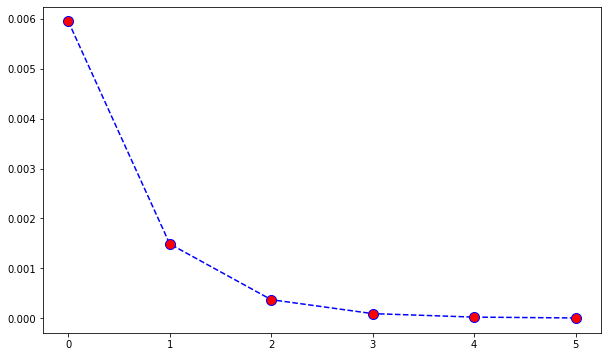

In [14]:
# further confirmation (visual)
plt.figure(figsize=(10,6))
plt.plot(range(0,6), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

In [15]:
# 4. Sammy Suliman, last modified: 10/5/2022
# The purpose of this code is to construct an approximation for the integral of f(x) = e^(-x^2) using the given
# formula for q(h). The expected outcome should be a value approximately equal to 4 with a particular value of h,
# and an approximation for the error of this value of h

In [16]:
def f(x):
    return np.exp(-x**2)

In [17]:
def q(h):
    return (comp_trap_rule(0, 1, int(2/h), f) - comp_trap_rule(0, 1, int(1/h), f)) / (comp_trap_rule(0, 1, int(4/h), f) - comp_trap_rule(0, 1, int(2/h), f))

In [18]:
qlist = []
for h in [1/20, 1/40, 1/60, 1/80, 1/100, 1/1000, 1/10000, 1/100000]:
    qlist.append(q(h))
print(qlist)

[4.0003124429143195, 4.000078121191858, 4.000034723577809, 4.000019531772387, 4.000012502201261, 4.000001352019113, 4.000046355358245, 4.005600617999227]


In [28]:
# we will choose 1/1000 as our h value which nets us a q(h) approximately equal to 4
h = 1/1000

In [30]:
# a) Sammy Suliman, last modified: 10/5/2022
# The purpose of this code is to find the approximation of the error, I[e^(-x^2)] - T_h[e^(-x^2)] for h = 1/100
approx_error = (4/3) * (comp_trap_rule(0, 1, int(2/h), f) - comp_trap_rule(0, 1, int(1/h), f))
print(approx_error)

6.131324603586563e-08


In [31]:
# b) Sammy Suliman, last modified:
# The purpose of this code is to use Simpson's rule to find an improved approximation for the integral.
# The expected outcome should be a value closer to the actual value of the integral than we would recieve from 
# the Composite Trapezoidal Rule
simpsons = comp_trap_rule(0, 1, int(1/h), f) + approx_error
print(simpsons)

0.7468241328124301


In [ ]:
# Simpson's rule is more accurate than the Composite Trapezoidal rule because the error rate of Simpson's rule
# is little-o(h^p), which goes to zero faster than h^p for p >= 2 whereas the error rate of the Composite Trapezoidal
# rule is big-O(h^2), so the error rate of Simpson's rule converges to zero faster. 